<a href="https://colab.research.google.com/github/shwetabhosale15/shweta/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Movie Recommendation System**

PURPOSE : Content base Recommender systems encompass a class of techniques and algorithms that can suggest “relevant” items to users. They predict future behavior based on past data.

We now live in what some call the “era of abundance”.For any given product, there are sometimes thousands of options to choose from. Think of the examples above: streaming videos, online shopping etc. Recommender systems help to personalize a platform and help the user find something they like.

#WORK FLOW :-

**DATA COLLECT --------> DATA PREPROCESSING ------> FEATURE EXTRACTION --------> USER INPUTE -------> COSINE SIMILARITY ALGORITHMS -------> LIST OF MOVIES.**

#**Import Library**

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import difflib
from sklearn.metrics.pairwise import cosine_similarity

#**Read Data**

In [2]:
movies_data=pd.read_csv('/content/movie recomendation system data.csv')

In [3]:
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [4]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

#**Check for missing values**

In [5]:
movies_data.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

# **Check for duplicate values**

In [6]:
movies_data.duplicated().sum()

0

In [7]:
import seaborn as sns

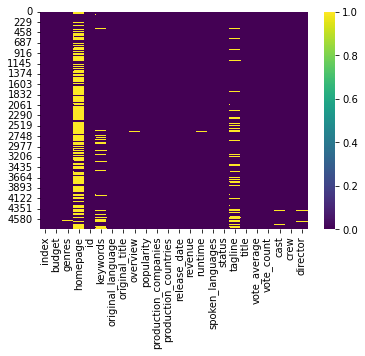

In [8]:
sns.heatmap(movies_data.isnull(),cmap='viridis')

#**Important Columns Selected**

In [9]:
selected_feature=['genres','keywords','tagline','cast','director']


In [10]:
print(selected_feature)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [11]:
for feature in selected_feature :
  movies_data[feature] =movies_data[feature].fillna('')

#**Replacing null values with null string**

In [ ]:
movies_data['genres'].fillna(' ', inplace=True)
movies_data['keywords'].fillna(' ', inplace=True)
movies_data['tagline'].fillna(' ', inplace=True)
movies_data['cast'].fillna(' ', inplace=True)
movies_data['director'].fillna(' ', inplace=True)

In [12]:
movies_data.isnull().sum()

index                      0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
director                   0
dtype: int64

#**Combine all the selected feature**

In [13]:
combine_features= movies_data['genres']+movies_data['tagline']+movies_data['cast']+movies_data['director']+movies_data['keywords']

In [15]:
print(combine_features)

0       Action Adventure Fantasy Science FictionEnter ...
1       Adventure Fantasy ActionAt the end of the worl...
2       Action Adventure CrimeA Plan No One EscapesDan...
3       Action Crime Drama ThrillerThe Legend EndsChri...
4       Action Adventure Science FictionLost in our wo...
                              ...                        
4798    Action Crime ThrillerHe didn't come looking fo...
4799    Comedy RomanceA newlywed couple's honeymoon is...
4800    Comedy Drama Romance TV MovieEric Mabius Krist...
4801    A New Yorker in ShanghaiDaniel Henney Eliza Co...
4802    DocumentaryDrew Barrymore Brian Herzlinger Cor...
Length: 4803, dtype: object


#**Object create for tranform textual data into numerical data.**

In [16]:
vectorizer=TfidfVectorizer()

In [17]:
feature_vectors=vectorizer.fit_transform(combine_features)
print(feature_vectors)

  (0, 22129)	0.20426143896683796
  (0, 4531)	0.23833003407606487
  (0, 25479)	0.12720306322403044
  (0, 22278)	0.3308250863073974
  (0, 9446)	0.16127165833325735
  (0, 4302)	0.2120548430553622
  (0, 3429)	0.27239862918529184
  (0, 20055)	0.27239862918529184
  (0, 16103)	0.15612436433237228
  (0, 13871)	0.23833003407606487
  (0, 22595)	0.16042200048066343
  (0, 25696)	0.19407434005592666
  (0, 21803)	0.20099414914542377
  (0, 20765)	0.2143529736367449
  (0, 26773)	0.19666005141543122
  (0, 26379)	0.2335497333721525
  (0, 20805)	0.15540315574153624
  (0, 17951)	0.25982492439285515
  (0, 17562)	0.08644522195851749
  (0, 26364)	0.12472089310150077
  (0, 23453)	0.07478480993668817
  (0, 8675)	0.27239862918529184
  (0, 21151)	0.0990189267509541
  (0, 8325)	0.11722339365953231
  (0, 372)	0.09056407440029525
  :	:
  (4801, 21507)	0.3149866898963259
  (4801, 26573)	0.3149866898963259
  (4801, 26740)	0.3004471539810804
  (4801, 7602)	0.2610521172477128
  (4801, 586)	0.19362615158831434
  (4801, 

#**findout movies similarity**

In [ ]:
cosine_similarity

<function sklearn.metrics.pairwise.cosine_similarity(X, Y=None, dense_output=True)>

In [18]:
similarity=cosine_similarity(feature_vectors)
print(similarity)

[[1.         0.06901164 0.01487269 ... 0.         0.         0.        ]
 [0.06901164 1.         0.02843756 ... 0.01198707 0.         0.        ]
 [0.01487269 0.02843756 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.01198707 0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [19]:
print(similarity.shape)    #Each movie compare with each other movies.

(4803, 4803)


#**Getting the movie name from user**

In [60]:
movie_name=input('Enter your favourite movie name: ')

Enter your favourite movie name: Iron man


#**Creating  list of all movie name**

In [61]:
list_of_all_title=movies_data['title'].tolist()
print(list_of_all_title)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

#**Finding the close match**

In [62]:
find_close_match = difflib.get_close_matches(movie_name,list_of_all_title)


In [63]:
print(find_close_match)

['Iron Man', 'Iron Man 3', 'Iron Man 2']


In [64]:
close_match= find_close_match[0]
print(close_match)

Iron Man


#**Finding the index of the movies with title**

In [65]:
index = movies_data[movies_data.title==close_match]['index'].values[0]
print(index)

68


#**Getting a list of similar movies**

In [66]:
similarity_score=list(enumerate(similarity[index]))
print(similarity_score)

[(0, 0.015200781250861583), (1, 0.03441342632508187), (2, 0.006062863808423918), (3, 0.006616788903231497), (4, 0.014878028572967338), (5, 0.006126861172982839), (6, 0.02284652638205501), (7, 0.18231133364470842), (8, 0.0), (9, 0.06893255101158824), (10, 0.05474389980729586), (11, 0.005491173697219154), (12, 0.0), (13, 0.0057094441863028336), (14, 0.07689545312109769), (15, 0.0), (16, 0.22053807660319039), (17, 0.005712612073420635), (18, 0.015195618669858822), (19, 0.005128831185151063), (20, 0.06922652734618127), (21, 0.0051465576834811965), (22, 0.0), (23, 0.0), (24, 0.0), (25, 0.0), (26, 0.19749646919338076), (27, 0.014047649874765557), (28, 0.0627718946711451), (29, 0.006153306487125511), (30, 0.07121442787862149), (31, 0.2523749822145097), (32, 0.02002538906127502), (33, 0.12413428207405011), (34, 0.0), (35, 0.031573966600638825), (36, 0.028935533123816883), (37, 0.0), (38, 0.099102878453793), (39, 0.07532007164769987), (40, 0.0), (41, 0.04563713370723592), (42, 0.0), (43, 0.0314

#**Sorting the movies based on similarity**

In [67]:
sorted_similar_movies = sorted(similarity_score,key= lambda x:x[1],reverse=True)
print(sorted_similar_movies)

[(68, 1.0), (31, 0.2523749822145097), (79, 0.23056381850205768), (16, 0.22053807660319039), (26, 0.19749646919338076), (7, 0.18231133364470842), (182, 0.1724916878773812), (4401, 0.15648714850795523), (511, 0.14704721494697878), (203, 0.1444209957411174), (85, 0.13922121171476304), (174, 0.13853389431558347), (64, 0.13692940588141558), (101, 0.13515810680793133), (788, 0.12560513253915323), (33, 0.12413428207405011), (46, 0.1213102665242313), (353, 0.11742916510189574), (2235, 0.1014435221392302), (1740, 0.10119081662793737), (1210, 0.10063783117606918), (38, 0.099102878453793), (954, 0.09901169575077834), (3166, 0.09782137151991747), (1406, 0.09410043847737022), (882, 0.092288744617536), (126, 0.09010072706599864), (1282, 0.08846413835813378), (2186, 0.08835576726795918), (3983, 0.0882504620012514), (232, 0.08724325101376847), (242, 0.08702088053217259), (122, 0.08620646487102411), (3443, 0.0844752528518577), (2492, 0.08428714103547907), (2063, 0.08292753743690691), (2390, 0.082826902

#**Print the top 10 name of movie**

In [68]:
print('movies for u : \n')
i=1
for movie in sorted_similar_movies:
  index=movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if(i<11):
    print(i,'.',title_from_index)
    i+=1

movies for u : 

1 . Iron Man
2 . Iron Man 3
3 . Iron Man 2
4 . The Avengers
5 . Captain America: Civil War
6 . Avengers: Age of Ultron
7 . Ant-Man
8 . The Helix... Loaded
9 . X-Men
10 . X2


#It can be considered an important part of the e-commerce ecosystem, and reduce a large amount of data to a manageable amount and recommends it to the user according to his interests, desires, and choices.